<a href="https://colab.research.google.com/github/YasuharuSuzuki/23_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 16 
# Section 16-3 アヤメを分類する(教科書P.397)

## 参考サイト
### [【Python入門】7-1. pandasライブラリ](https://utokyo-ipp.github.io/7/7-1.html)
### [【Python入門】7-2. scikit-learnライブラリ](https://utokyo-ipp.github.io/7/7-2.html)

## サンプルプログラム2　アヤメを分類する

In [1]:
from sklearn import datasets # scikit-learnのdatasetsライブラリ
from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.model_selection import ShuffleSplit # データをシャッフルして分割する機能

In [5]:
# アヤメのデータセットを読み込む
iris = datasets.load_iris(as_frame=True)
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [96]:
iris.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [97]:
iris.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- irisの場合は data にもDataFrameが入っている
- targetが無くなっている辺りは、扱いやすいデータになっている認識

In [7]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [8]:
X = iris.data.values
y = iris.target.values

In [9]:
# データを分割するインデックスを作る
iris_ss = ShuffleSplit(train_size=0.6, test_size=0.4, random_state=0)
train_index, test_index = next(iris_ss.split(X))

In [10]:
# データを分割する
X_train, y_train = X[train_index], y[train_index]    # 訓練データ
X_test, y_test = X[test_index], y[test_index]    # テストデータ
clf = svm.SVC()    # モデルを作る
clf.fit(X_train, y_train)    # 訓練する
print(clf.score(X_test, y_test))    # 正答率を調べる

0.9333333333333333


---
---
---
---
---

## 練習プログラム2　RandomForestで分類器を作る(4.0点)

### 学習器のimport
- RandomForestの学習器は以下の文でimportできます
```python
from sklearn.ensemble import RandomForestClassifier
```

### 学習器の作成
```python
clf = svm.SVC()    # 学習器
```
- SVMでは上記のように作成しましたが、RandomForestでは以下の文で作成できます
```python
rf = RandomForestClassifier()    # 学習器
```

### その他
- 学習させた時にfitを使用したり、その後の学習結果の評価方法はSVMと同じです
- 正答率を算出したり、classification repotやconfusion matrixを表示してみましょう

正答率 = 0.95
誤った個数：3


classification report


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,16.00
1,0.916667,0.956522,0.936170,23.00
2,0.950000,0.904762,0.926829,21.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.955556,0.953761,0.954333,60.00
weighted avg,0.950556,0.950000,0.949922,60.00


confusion matrix


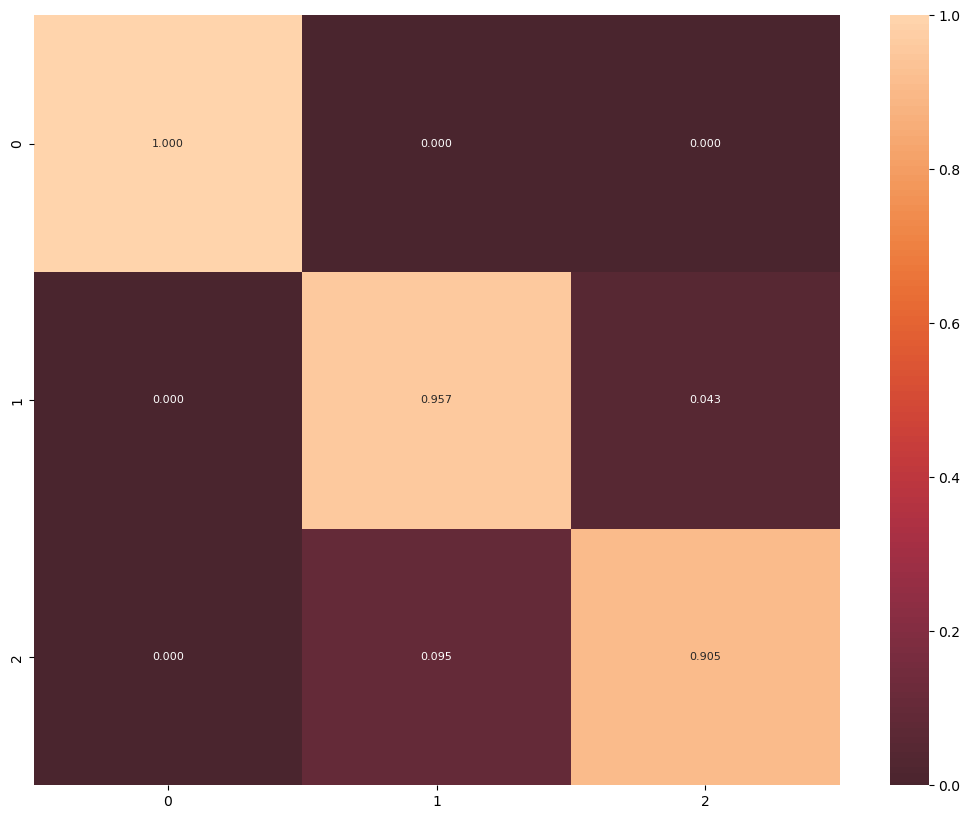

#### あやめのデータを可視化するクラスの作成
- グラフの授業で作ったものをベースに改良したものです。

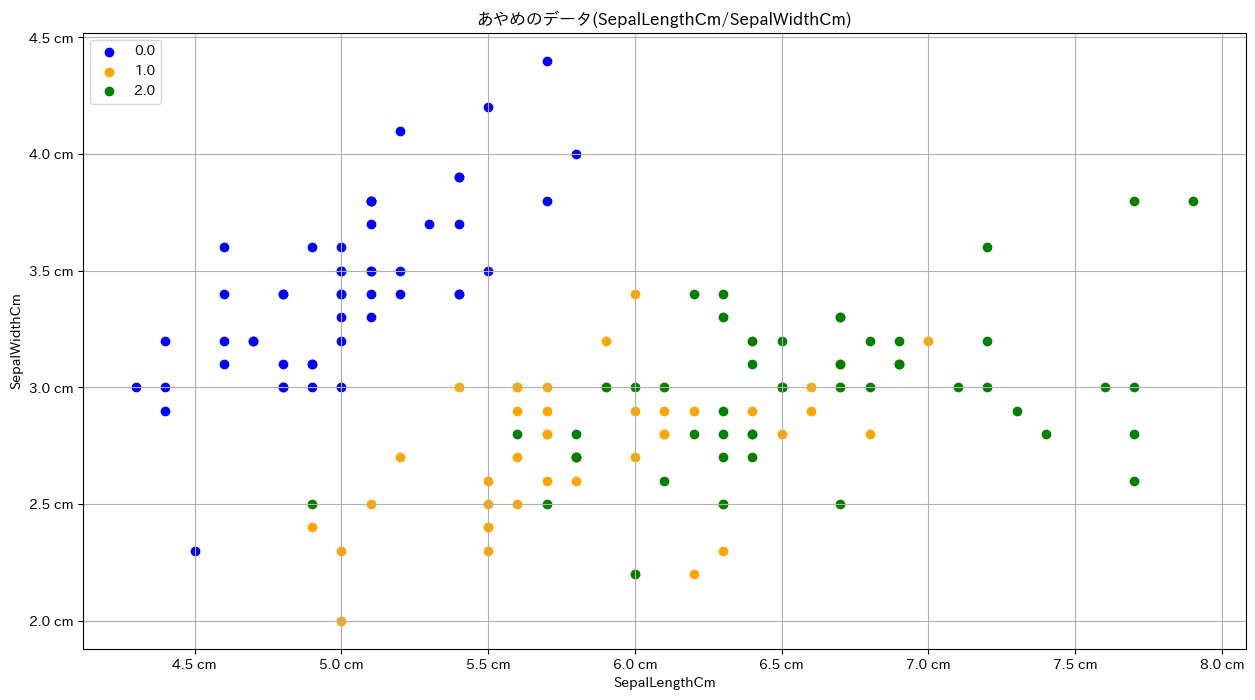

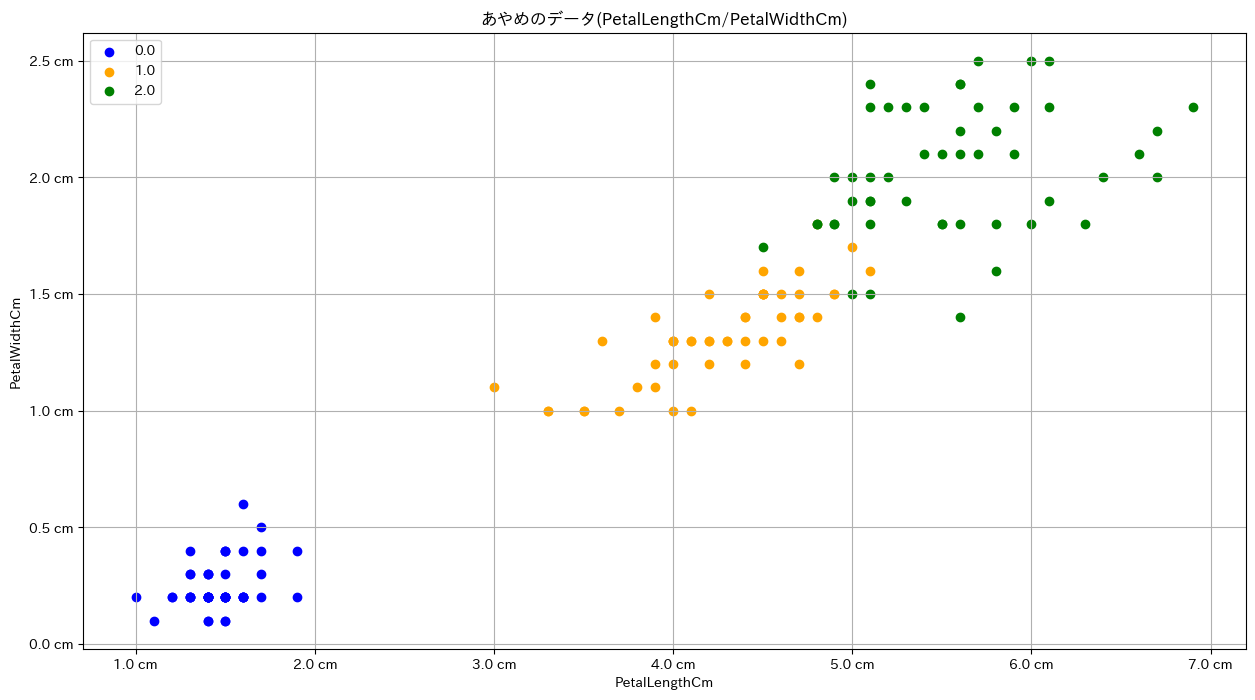

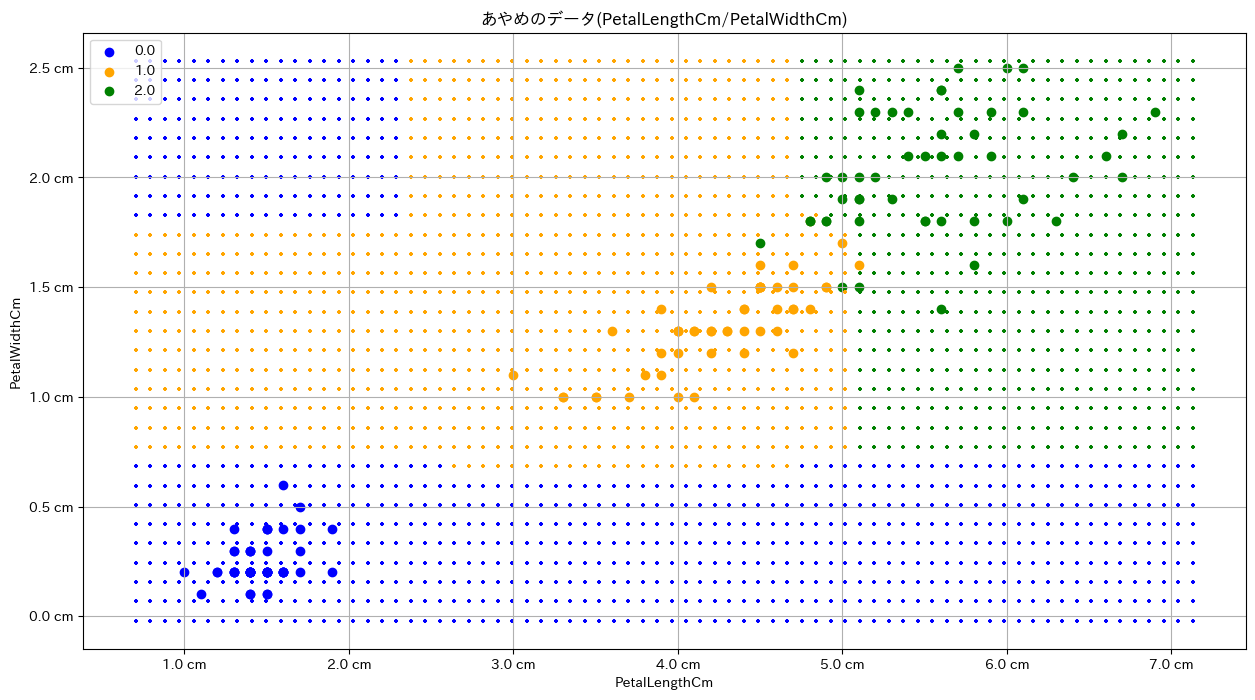

#### FeatureImportances
- どの特徴量が重要かを示したグラフ

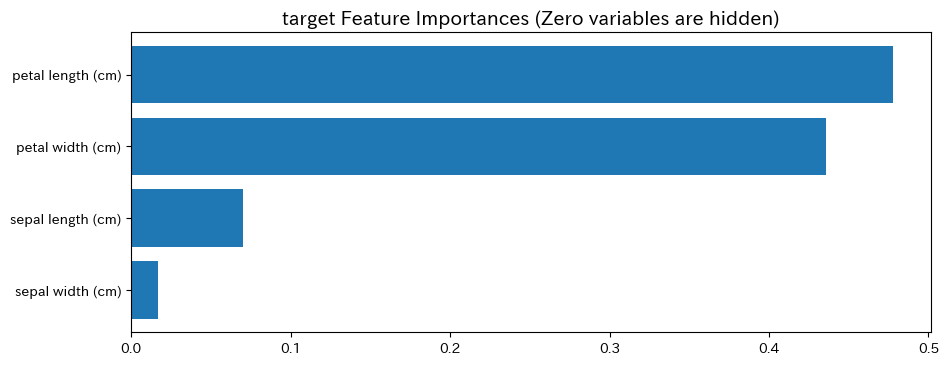